In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.fft as ffour
import numpy as np

In [2]:
cumb_sample_df=pd.read_csv('./1P36A01R01.dat',delimiter=",")

# File Format

The data have been organised in separate folders with .dat files for each data collection, with details provided 
in the remainder of this document. <br> 
The data files have been named with this generic approach KPXXAYYRZ so that
* the digits K 1 2 3 4 5 and 6 at the beginning indicates the activities walking, sitting down, stand up, pick up 
an object, drink water, and fall respectively; <br>
* the characters XX indicate the subject (individual person) having ID XX (01, 02, etc…);
* the characters YY indicate the activity being performed such as A01, A02, A03, A04, A05, and A06; <br>
* the character Z indicates the repetition of the activity such as R1, R2, etc. <br>


Some information about the subjects (age, height, gender, dominant hand) is also reported in this document 
as metadata. Note also that in some cases not all the information were available, and this has been replaced 
by n/a for some subjects.


In [3]:
cumb_sample_df.shape

(1280003, 1)

In [4]:
cumb_sample_df.head(10)

,5800000000.000000
0,1.000000
1,128
2,400000000.000000
3,1812+1897i
4,1782+2029i
5,2265+2014i
6,2286+1763i
7,2401+2152i
8,2342+2324i
9,2225+2441i


In [32]:
cumb_sample_df.describe()

,5800000000.000000
count,1280003
unique,804719
top,2033+2080i
freq,12


# Array format

When imported into MATLAB (or equivalent software), each file is seen as a long 1D complex array (or table). <br> 
The first 4 elements include in this order 
* the carrier frequency (5.8 GHz) * the duration of the chirp (1 ms) 
* the number of samples per recorded beat-note signal (128 samples) 
* and the bandwidth of the chirp (400 MHz); 

the following elements are the complex samples of the sequence of recorded beat-notes one after the other.

In [44]:
# drop the first 3 as they are duration, number of samples and bandwidth (the carrier frequency came through as
# the column name which we will rename later)

cumb_sample_df=cumb_sample_df.drop([0,1,2])
cumb_sample_df=cumb_sample_df.rename(columns={'5800000000.000000':'complex_array'})
cumb_sample_df=cumb_sample_df.reset_index(drop=True)
print(cumb_sample_df.dtypes)

complex_array        object
real_comp             int64
im_comp               int64
complex_col      complex128
dtype: object


# Tips from Francesco

Each file you download should come in the form of a long vector -
<span style="color:red">Need to paste text here from email</span>.

In [34]:
real_list=[]
imaginary_list=[]
complex_list=[]
for c_num in cumb_sample_df['complex_array']:
    c_split=c_num.split('+')
    real_list.append(int(c_split[0]))
    im_input=c_split[1]
    com_input=im_input.replace("i","")
    com_input=int(com_input)
    imaginary_list.append(com_input)
    complex_list.append(complex(int(c_split[0]),com_input))

In [35]:
cumb_sample_df=cumb_sample_df.assign(real_comp=real_list)
cumb_sample_df=cumb_sample_df.assign(im_comp=imaginary_list) 
cumb_sample_df=cumb_sample_df.assign(complex_col=complex_list)
np_comp_array=cumb_sample_df['complex_col'].to_numpy(dtype=complex)
np_comp_reshape=np.reshape(np_comp_array,(10000,128))
comp_list_rb=[]
for comp_list in np_comp_reshape:
    list_rb=[]
    list_rb=ffour.fft(comp_list)
    comp_list_rb.append(list_rb)
comp_list_rb_abs=[]
max_abs=0
min_abs=0
for comp_list_abs in comp_list_rb:
    list_rb_abs=[]
    list_rb_abs=abs(comp_list_abs)
    max_list=max(list_rb_abs)
    min_list=min(list_rb_abs)
    if max_list>max_abs:
        max_abs=max_list
    if min_list< min_abs and not min_abs==0:
        min_abs=min_list
    elif min_abs==0:
        min_abs=min_list
    comp_list_rb_abs.append(list_rb_abs)

In [36]:
print(cumb_sample_df.head(100))

   complex_array  real_comp  im_comp     complex_col
0     1812+1897i       1812     1897  1812.0+1897.0j
1     1782+2029i       1782     2029  1782.0+2029.0j
2     2265+2014i       2265     2014  2265.0+2014.0j
3     2286+1763i       2286     1763  2286.0+1763.0j
4     2401+2152i       2401     2152  2401.0+2152.0j
..           ...        ...      ...             ...
95    2093+1768i       2093     1768  2093.0+1768.0j
96    2231+1925i       2231     1925  2231.0+1925.0j
97    2243+2153i       2243     2153  2243.0+2153.0j
98    2119+2275i       2119     2275  2119.0+2275.0j
99    1986+2211i       1986     2211  1986.0+2211.0j

[100 rows x 4 columns]


In [43]:
print(real_list[0:4])
print(imaginary_list[0:4])
print(complex_list[0:4])
print(len(real_list))
#print(cumb_sample_df.dtypes)
#print(np_comp_array)
#print(np_comp_array.dtype)
#print(np_comp_reshape)
#print(np_comp_reshape.shape)
##print(list_rb)
#print(list_rb_abs)
print(min_abs)
print(max_abs)

[1812, 1782, 2265, 2286]
[1897, 2029, 2014, 1763]
[(1812+1897j), (1782+2029j), (2265+2014j), (2286+1763j)]
1280000
0.151100548246267
373662.3934101477


   Absolute_values
0    370411.175567
1      2335.739867
2      1503.475480
3      1435.227699
4      1457.870976
5      1882.958307
6      2102.611910
7      2547.913905
8      1657.275289
9      5427.939413
128


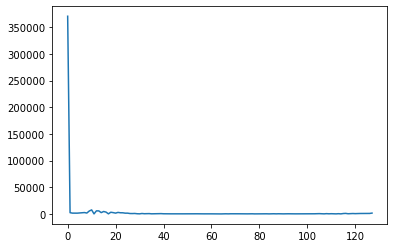

In [38]:
df_abs_val=pd.DataFrame(list_rb_abs,columns=['Absolute_values'])
print(df_abs_val.head(10))
print(len(list_rb_abs))
plt.plot(df_abs_val['Absolute_values'])
plt.show()